##  Bank Personal Loan Campaign

### 1.  Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. 

In [ ]:
## importing libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
# importing data

df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()      

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.shape

(5000, 14)

In [ ]:
df.dtypes        

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
 # Convert negative values to non-negative using .abs function

df['Experience'] = df['Experience'].abs()

df.describe()

NameError: ignored

In [ ]:
df.isnull().sum()  #checking for null Values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## EDA

### 2.  EDA: Study the data distribution in each attribute and target variable, and note the observations.


In [ ]:
df.nunique()
# to obtain unique values in each column

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)


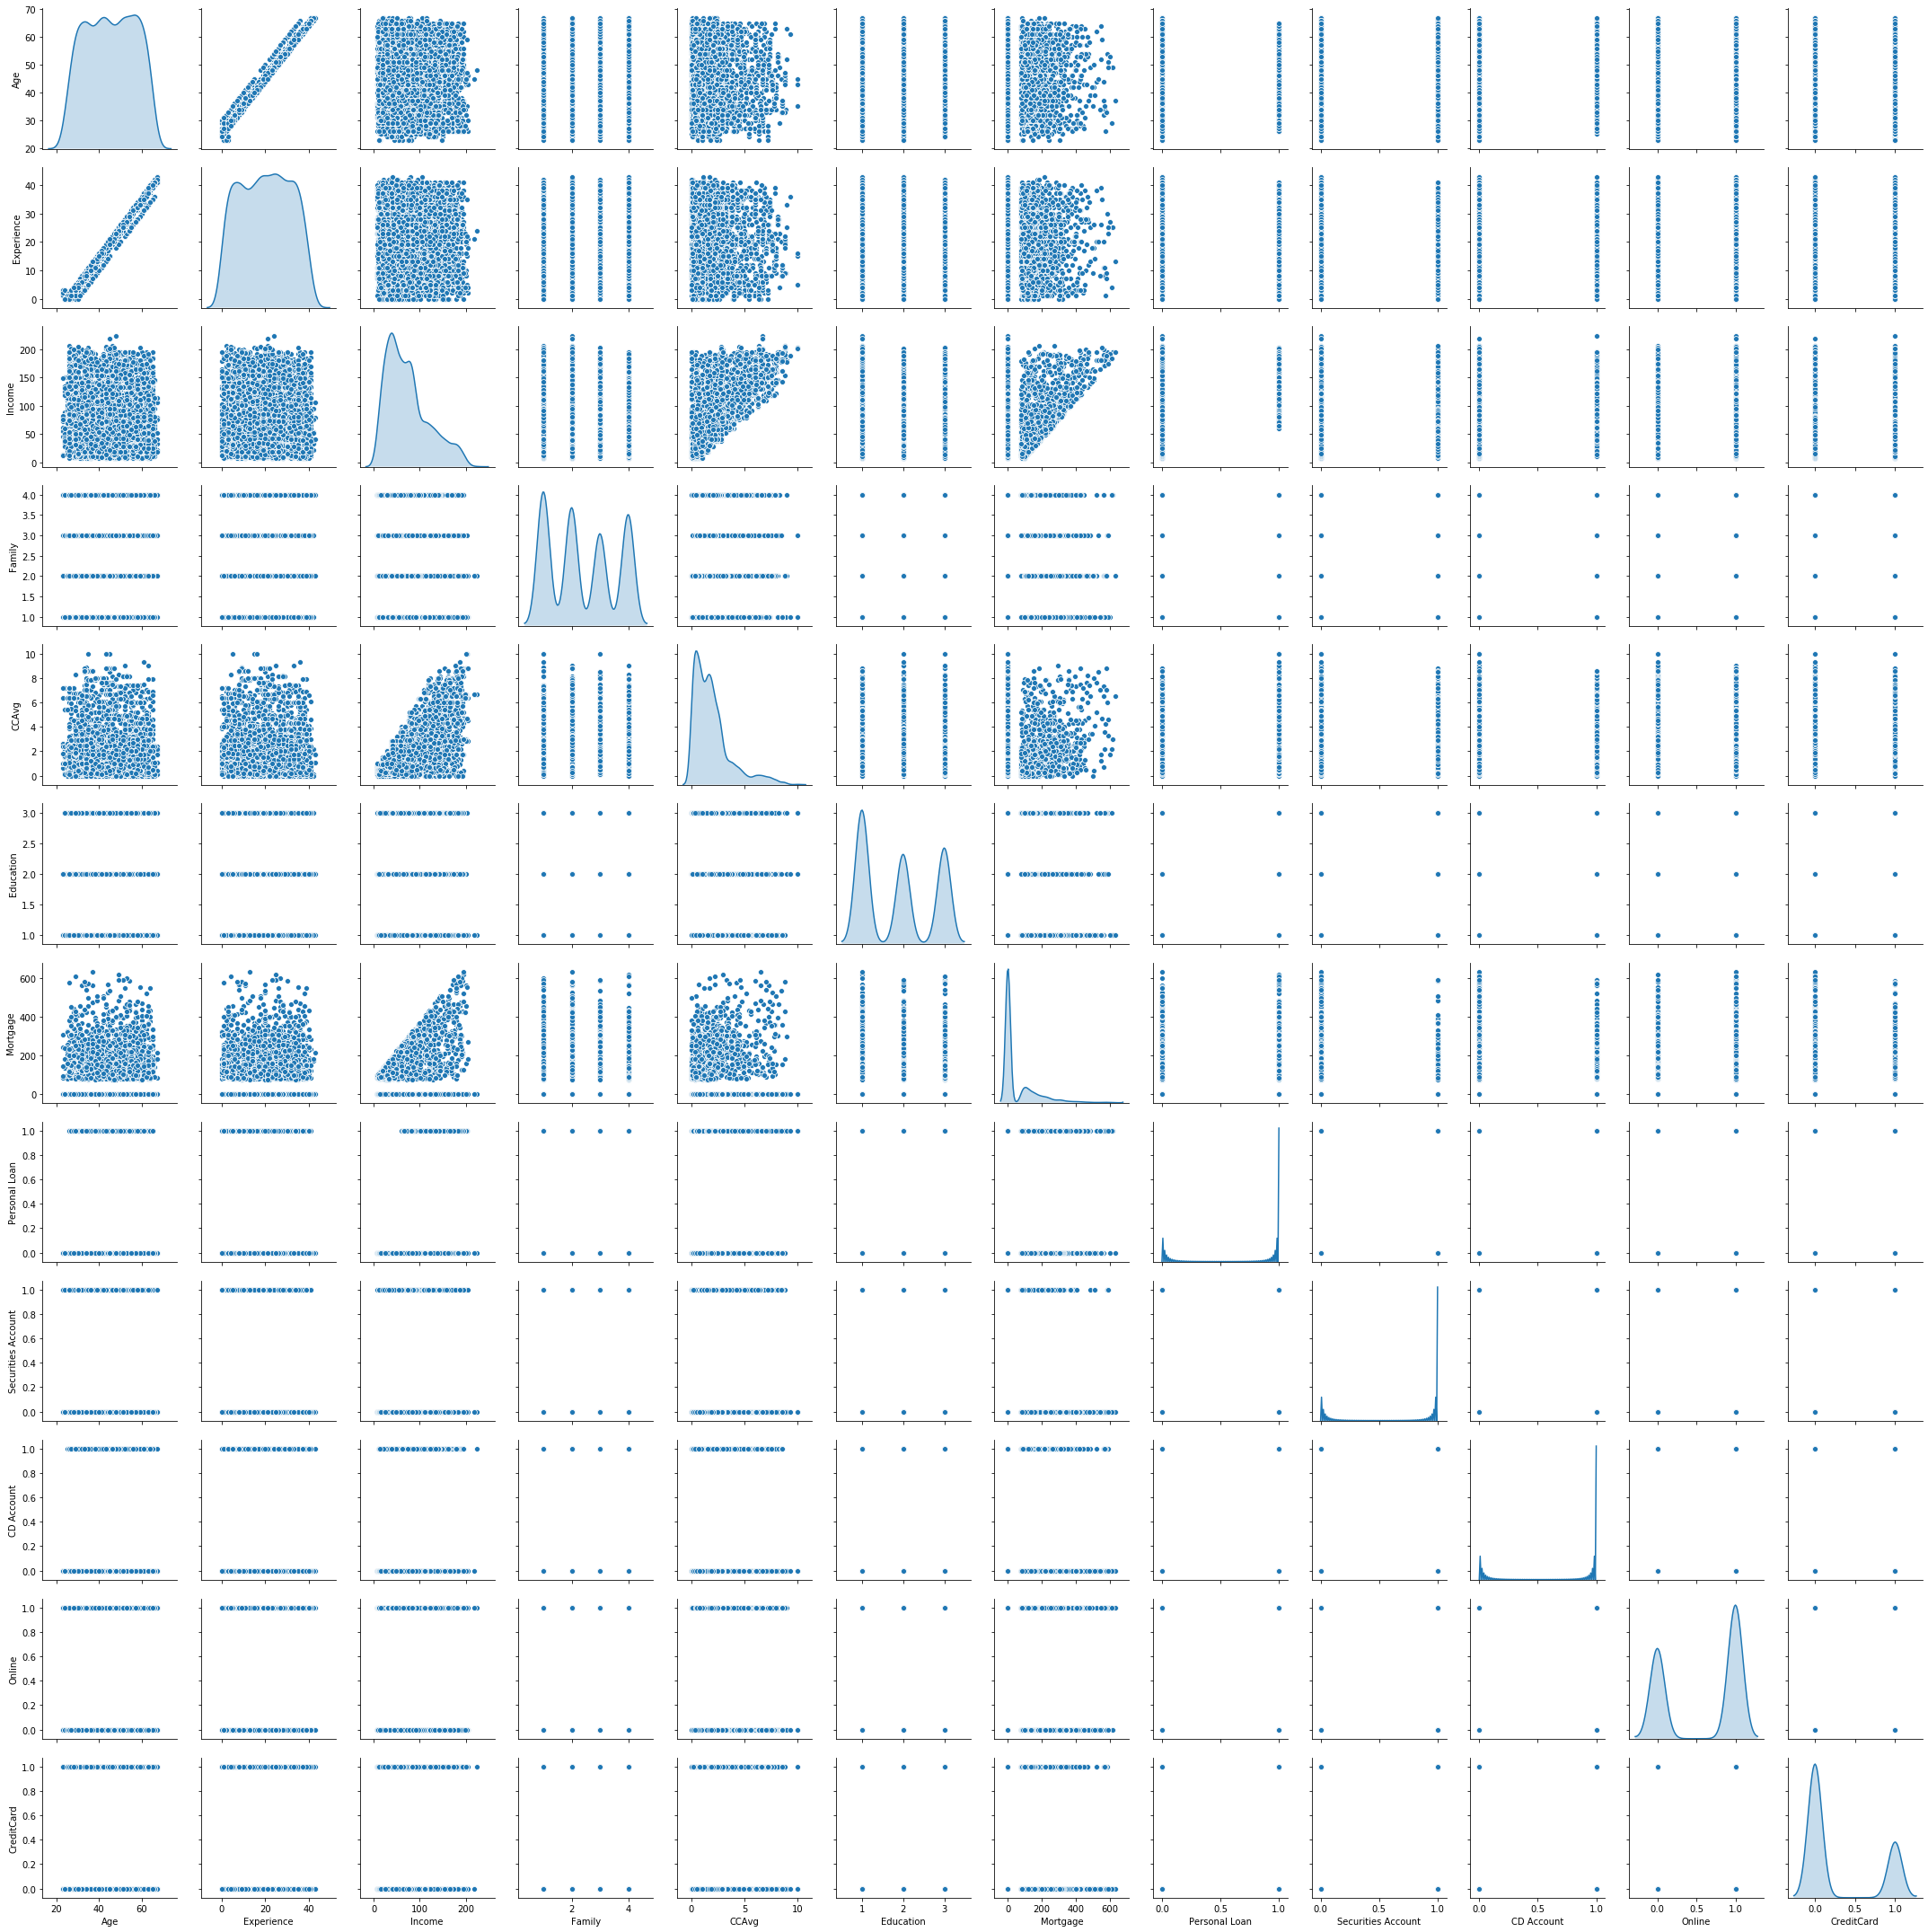

In [ ]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [ ]:
# Age and experience have strong positive relation
# Age and Experience have uniform distribution
# Income is positively skewed

### Target Variable is Personal Loan

In [ ]:
vc = df[['Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Col_Name',0:"Value_Count_1"})
vc['Value_Count_0'] = df.shape[0] - vc['Value_Count_1']
vc

# Value counts of all the category column with two unique values (0,1)

,Col_Name,Value_Count_1,Value_Count_0
0,Personal Loan,480,4520
1,Securities Account,522,4478
2,CD Account,302,4698
3,Online,2984,2016
4,CreditCard,1470,3530


Text(0, 0.5, 'Percentage')

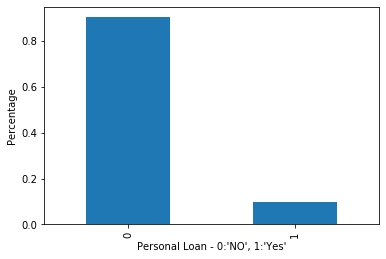

In [ ]:
df['Personal Loan'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel("Personal Loan - 0:'NO', 1:'Yes'")
plt.ylabel("Percentage")

In [ ]:
df[df['Mortgage']==0].shape[0]

#count of people having home mortgage as zero; Most of the people do not have mortgage

3462

In [ ]:
pd.crosstab(df['Personal Loan'], df['CreditCard'],normalize='all')

CreditCard,0,1
Personal Loan,,
0,0.6386,0.2654
1,0.0674,0.0286


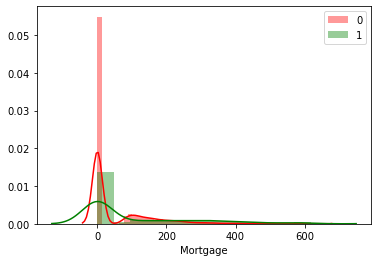

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='g',label=1)
plt.legend()
plt.show()

# Most people with zero motgage are not taking personal loans

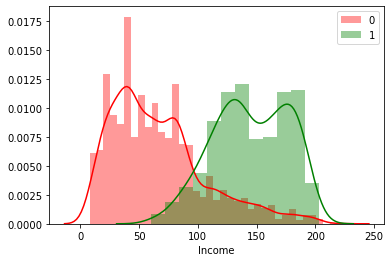

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],color='g',label=1)
plt.legend()
plt.show()

# Number of People with high income taking personal loan are high as compared to low income

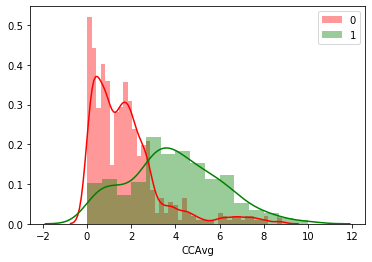

In [ ]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],color='g',label=1)
plt.legend()
plt.show()

# People with high avg credit card spending per month are taking personal loans

In [ ]:
df[df['CCAvg']==0].shape[0]

#count of people having zero monthly spending on credit card

106

### 3]  	Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [ ]:
# Separate the independent attributes i.e. every column except personal loan
# Store the target column (Personal Loan) into Y array

x = df.loc[:, df.columns != 'Personal Loan']  # independent variables

y = df.loc[:, df.columns == 'Personal Loan']  # Target variable


In [ ]:
y.head()  

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


### 4.  Using Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [ ]:


from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=7)


In [ ]:
xtrain.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
717,59,34,94,3,0.5,1,0,0,0,0,1
2496,63,37,32,3,0.7,2,141,0,0,0,0
2469,43,18,89,1,0.1,2,307,0,0,0,1
1375,50,26,179,1,2.9,3,0,0,0,0,1
2742,39,14,89,2,0.4,1,0,0,0,1,0


In [ ]:
xtest.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3406,42,12,34,3,2.0,3,0,0,0,0,1
757,52,28,81,3,1.8,2,0,1,0,0,0
3624,58,28,70,1,1.4,3,0,0,0,0,0
4544,28,4,80,3,2.5,1,0,0,0,1,0
3235,60,35,39,2,1.6,3,0,0,0,1,0


#### Base Model

In [ ]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",model.score(xtest, ytest))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.9485714285714286

Testing accuracy 0.9533333333333334


In [ ]:
#### Here the model performs better in testing than training. Therefore, it is a good model

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score


In [ ]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

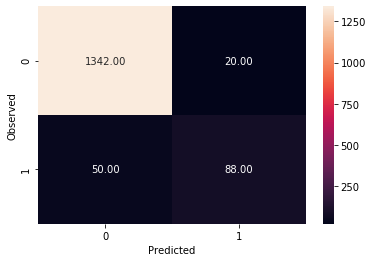

In [ ]:
draw_cm(ytest,y_predict)

In [ ]:
recall_score(ytest,y_predict)

0.6376811594202898

In [ ]:
precision_score(ytest,y_predict)

0.8148148148148148

In [ ]:
f1_score(ytest,y_predict)

0.7154471544715448

In [ ]:
roc_auc_score(ytest,y_predict)

0.8114984358041243

In [ ]:
# !pip install yellowbrick

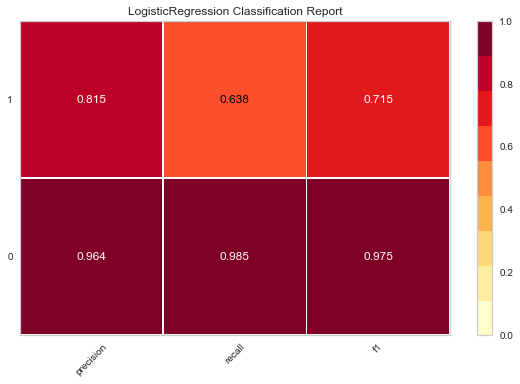

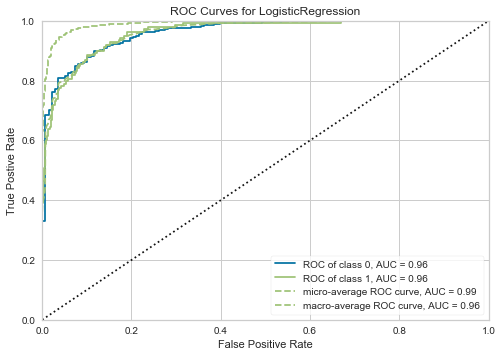

In [ ]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

### 5.  Scope of improvement to make the model perform better



In [ ]:
# Checking Parameters of logistic regression
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#If we dont specify the parameters in the model it takes default value

In [ ]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3))
    test_score.append(round(model.score(xtest, ytest),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.951, 0.95, 0.949, 0.907, 0.904]

[0.955, 0.949, 0.953, 0.919, 0.916]


In [ ]:
model = LogisticRegression(random_state=7,penalty='l1')  # changing penalty to l1

model.fit(xtrain, ytrain)

y_predict = model.predict(xtest)     

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))   

Trainig accuracy 0.9517142857142857

Testing accuracy 0.9553333333333334


In [ ]:
## Accuracy is almost same for 'l1' and 'l2' with solver 'newton-cg' , chosing 'l1'

In [ ]:
model = LogisticRegression(random_state=7,penalty='l1',class_weight='balanced') # changing class weight to balanced

model.fit(xtrain, ytrain) 

y_predict = model.predict(xtest)     

print("Trainig accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))   

Trainig accuracy 0.8934285714285715

Testing accuracy 0.8893333333333333


In [ ]:
## Accuracy decreased so removing class weight from the model, 

In [ ]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=7,penalty='l1', C=i)  # changing values of C
    model.fit(xtrain, ytrain) 
    y_predict = model.predict(xtest)     
    train_score.append(round(model.score(xtrain,ytrain),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(xtest, ytest),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.921, 0.947, 0.949, 0.949, 0.951, 0.952]

[0.935, 0.949, 0.95, 0.955, 0.955, 0.955]


In [ ]:
## Best testing accuracy is obtained for C=1, which is default

Trainig accuracy 0.9514285714285714

Testing accuracy 0.9546666666666667

Confusion Matrix


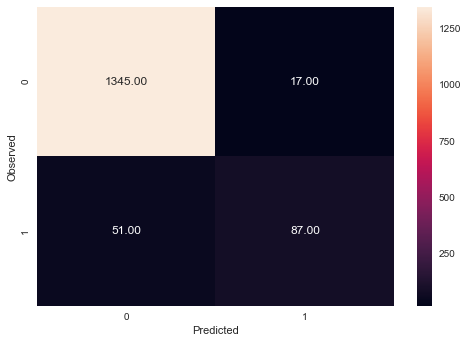

None

Recall: 0.6304347826086957

Precision: 0.8365384615384616

F1 Score: 0.71900826446281

Roc Auc Score: 0.8089765689842304


In [ ]:
#Therefore final model is
model = LogisticRegression(random_state=7,penalty='l2', solver='newton-cg') 
model.fit(xtrain, ytrain)
y_predict = model.predict(xtest)
print("Training accuracy",model.score(xtrain,ytrain))  
print()
print("Testing accuracy",model.score(xtest, ytest))
print()
print('Confusion Matrix')
print(draw_cm(ytest,y_predict))
print()
print("Recall:",recall_score(ytest,y_predict))
print()
print("Precision:",precision_score(ytest,y_predict))
print()
print("F1 Score:",f1_score(ytest,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(ytest,y_predict))

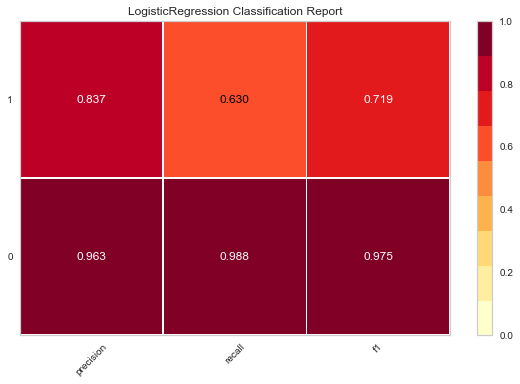

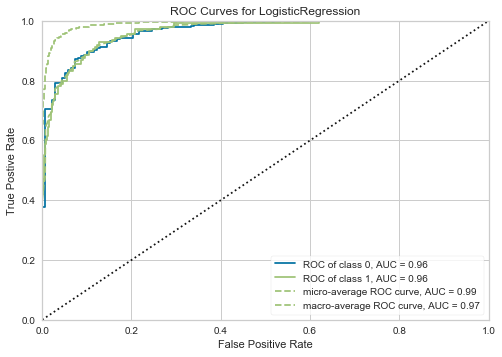

In [ ]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(xtrain, ytrain)
viz.score(xtest, ytest)
viz.show()

roc = ROCAUC(model)
roc.fit(xtrain, ytrain)
roc.score(xtest, ytest)
roc.show()

### 6. Give Business understanding of the model?

**Confusion matrix means**

*True Positive :*

Predicted Personal loan will be taken and the customer took it

*False Positive :*

Predicted Personal loan will be taken and the customer did not take it

*True Negative :*

Predicted Personal loan will not be taken and the customer did not take it

*False Negative :*

Predicted Personal loan will not be taken and the customer took it

Here more focus towards should be towards recall because our target variable is 'Personal Loan' , i.e whether the customer is accepting the personal loan or not. And the bank wants more people to accept personal loan i.e. less number of False Negative, so that bank doesn't lose real customers who want to take loan. Hence the focus should be on increasing Recall.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personal loan. They can use the model for upcoming customers.